In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Read in teams and data
data = pd.read_csv('stats/teams.csv')
data_dict = data.to_dict(orient='records')

teams = {}
for team in data_dict:
    teams.update({team['Name'] : team})

# print(teams)

## For each team get their stats into a dataframe and append to respecitve dicts
for team in teams:
    url = 'https://www.baseball-reference.com/teams/' + teams[team]['Acronym'] + '/2023.shtml'
    
    team_stats = pd.read_html(url)
    
    batting_stats = team_stats[0]
    pitching_stats = team_stats[1]

    ## Clean up batting stats

    # Only include actual players
    batting_stats = batting_stats[batting_stats['Rk'] != 'Rk']
    batting_stats = batting_stats[batting_stats['Rk'].notnull()]

    # Only include players with at least one at bat
    batting_stats = batting_stats[batting_stats['PA'] != '0']

    # Convert the relevant columns to numeric info
    batting_stats[['Age', 'G', 'PA', 'AB', 'R', 'H', '2B', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB']] = batting_stats[['Age', 'G', 'PA', 'AB', 'R', 'H', '2B', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB']].apply(pd.to_numeric)
    
    ## Clean up pitching stats
    
    pitching_stats = pitching_stats[pitching_stats['Rk'] != 'Rk']
    pitching_stats = pitching_stats[pitching_stats['Rk'].notnull()]

    # Convert pitching stats to numeric info
    pitching_stats[['Age', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W']] = pitching_stats[['Age', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W']].apply(pd.to_numeric)
    
    teams[team]['Batting Stats'] = batting_stats
    teams[team]['Pitching Stats'] = pitching_stats


<AxesSubplot: xlabel='Name'>

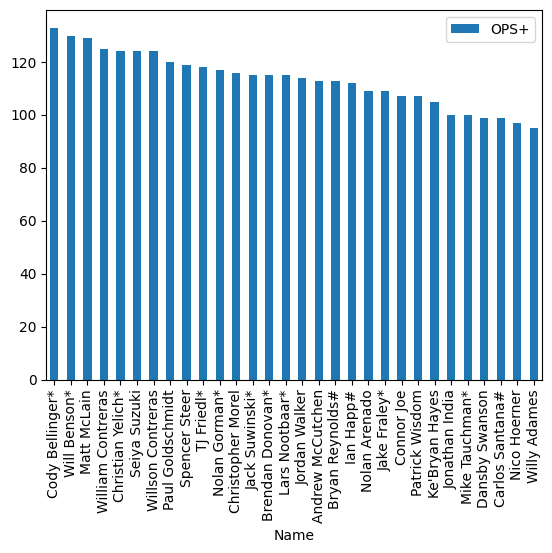

In [6]:
batting_stats_frames = []
for team in teams:
    batting_stats_frames.append(teams[team]['Batting Stats'])

all_batting_stats = pd.concat(batting_stats_frames)
top_ops = all_batting_stats[all_batting_stats['G'] > 81].sort_values(by='OPS+', ascending=False).head(30)
top_ops.plot.bar(y='OPS+', x='Name', ) 

In [27]:

top_ops.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  # .relabel_index(["row 1", "row 2"], axis=0)

,RK,POS,NAME,AGE,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
6,7,CF,Cody Bellinger*,27,130,556,499,95,153,29,1,26,97,20,6,40,87,.307,"0,356","0,525","0,881","133,000",262,7,5,0,12,3
7,8,RF,Will Benson*,25,108,329,287,51,79,15,8,11,31,19,3,40,103,.275,"0,365","0,498","0,863","130,000",143,3,1,0,1,0
10,10,MI,Matt McLain,23,89,403,365,65,106,23,4,16,50,14,5,31,115,.290,"0,357","0,507","0,864","129,000",185,5,7,0,0,0
0,1,C,William Contreras,25,141,611,540,86,156,38,1,17,78,6,1,63,126,.289,"0,367","0,457","0,825","125,000",247,23,5,1,2,2
5,6,LF,Christian Yelich*,31,144,632,550,106,153,34,1,19,76,28,3,78,140,.278,"0,370","0,447","0,818","124,000",246,15,3,0,1,7
7,8,RF,Seiya Suzuki,28,138,583,515,75,147,31,6,20,74,6,7,59,130,.285,"0,357","0,485","0,842","124,000",250,8,2,0,7,3
0,1,C,Willson Contreras,31,125,495,428,55,113,27,0,20,67,6,3,51,111,.264,"0,358","0,467","0,826","124,000",200,12,13,1,2,0
1,2,1B,Paul Goldschmidt,35,154,687,593,89,159,31,0,25,80,11,2,87,161,.268,"0,363","0,447","0,810","120,000",265,12,3,0,3,6
1,2,1B,Spencer Steer,25,156,665,582,74,158,37,3,23,86,15,3,68,139,.271,"0,356","0,464","0,820","119,000",270,9,11,0,4,0
6,7,CF,TJ Friedl*,27,138,556,488,73,136,22,8,18,66,27,6,47,90,.279,"0,352","0,467","0,819","118,000",228,0,10,8,3,1
